# Bike Sharing Demand
A playground competition hosted by Kaggle in 2015.
Will Cukierski. (2014). Bike Sharing Demand. Kaggle. https://kaggle.com/competitions/bike-sharing-demand

Predict demands in the future with the use of regression; supervised learning.
Given data : date, time, weather details such as temperature and humidity, and the number of rentals.

Let's explore data first.

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('data/bike-sharing-demand/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


No missing values were found.

## Data Fields
<ol>
    <li>datetime - hourly date + timestamp</li>
    <li>season
        <ul>
            <li>1 = spring</li>
            <li>2 = summer</li>
            <li>3 = fall</li>
            <li>4 = winter</li>
        </ul>    
    <li>holiday - whether the day is considered a holiday</li>
    <li>workingday - whether the day is neither a weekend nor holiday</li>
    <li>weather
        <ul>
            <li>1: Clear, Few clouds, Partly cloudy, Partly cloudy</li>
            <li>2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist</li>
            <li>3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds</li>
            <li>4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog </li>
        </ul>
    </li>
    <li>temp - temperature in Celsius</li>
    <li>atemp - "feels like" temperature in Celsius</li>
    <li>humidity - relative humidity</li>
    <li>windspeed - wind speed</li>
    <li>casual - number of non-registered user rentals initiated</li>
    <li>registered - number of registered user rentals initiated</li>
    <li>count - number of total rentals</li>
</ol>

In [2]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


datetime -> year, day of week, hour
drop columns named casual and registered as the total demand is what we concern.

In [7]:
df['datetime'][0]

'2011-01-01 00:00:00'

In [3]:
df['year'] = df['datetime'].apply(lambda x:x.split(' ')[0].split('-')[0])
df['month'] = df['datetime'].apply(lambda x:x.split(' ')[0].split('-')[1])
df['hour'] = df['datetime'].apply(lambda x:x.split(' ')[1].split(':')[0])
df['hour'].unique()

array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23'], dtype=object)

In [4]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['dayofweek'] = df['datetime'].dt.dayofweek
df['dayofweek'].unique()

array([5, 6, 0, 1, 2, 3, 4], dtype=int32)

pandas.Series.dt.dayofweek
The day of the week with Monday=0, Sunday=6.

In [5]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

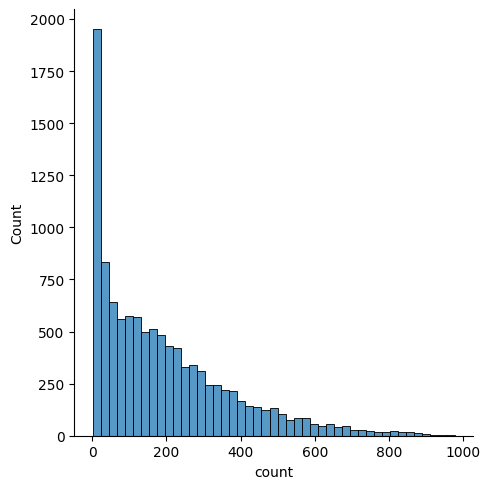

In [6]:
sns.displot(df['count'])

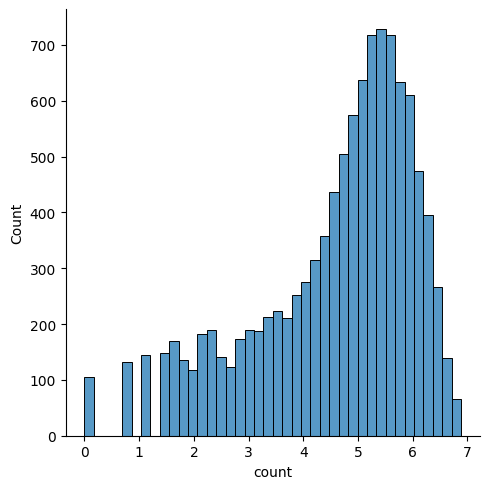

In [7]:
# to improve regression, use the log scale
sns.displot(np.log(df['count']))

In [8]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,01,00,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,01,01,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,01,02,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,01,03,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,01,04,5


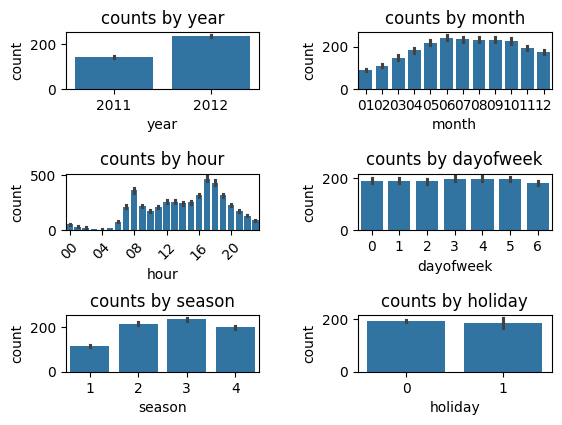

In [28]:
fig, axs = plt.subplots(3,2)
plt.tight_layout(pad=4)

sns.barplot(x='year', y='count', data=df, ax=axs[0,0])
sns.barplot(x='month', y='count', data=df, ax=axs[0,1])
sns.barplot(x='hour', y='count', data=df, ax=axs[1,0])
sns.barplot(x='dayofweek', y='count', data=df, ax=axs[1,1])
sns.barplot(x='season', y='count', data=df, ax=axs[2,0])
sns.barplot(x='holiday', y='count', data=df, ax=axs[2,1])

axs[0,0].set(title='counts by year')
axs[0,1].set(title='counts by month')
axs[1,0].set(title='counts by hour')
axs[1,0].tick_params(axis='x', labelrotation=45)
axs[1,0].set_xticks(range(0,24,4))
axs[1,1].set(title='counts by dayofweek')
axs[2,0].set(title='counts by season')
axs[2,1].set(title='counts by holiday')

plt.show()

More counts are observed in 2012 compared to its previous year.
Counts reach a peak in Summer.
Counts vary a lot throughout a day, showing two peaks at busy hours.
Counts do not seem to be affected by day of week much.
The most riders in Fall season.
No significant difference in counts between normal and holidays -> needs checking.

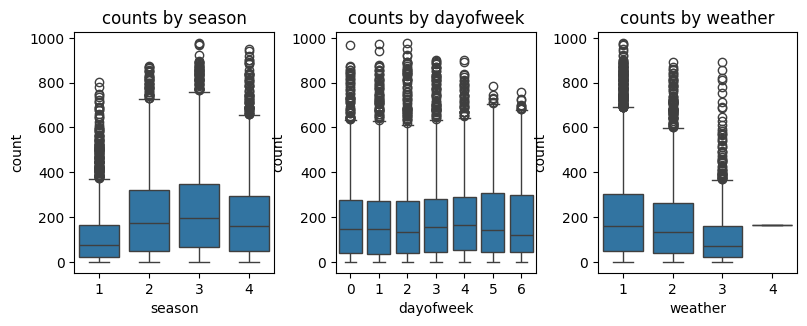

In [34]:
fig, axs = plt.subplots(1,3, figsize=(8,3))
plt.tight_layout()

sns.boxplot(x='season', y='count', data=df, ax=axs[0])
sns.boxplot(x='dayofweek', y='count', data=df, ax=axs[1])
sns.boxplot(x='weather', y='count', data=df, ax=axs[2])

axs[0].set(title='counts by season')
axs[1].set(title='counts by dayofweek')
axs[2].set(title='counts by weather')

plt.show()

Are their that many citizens who are willing to ride a bicyle in the heavy rain (wheather : 4)?

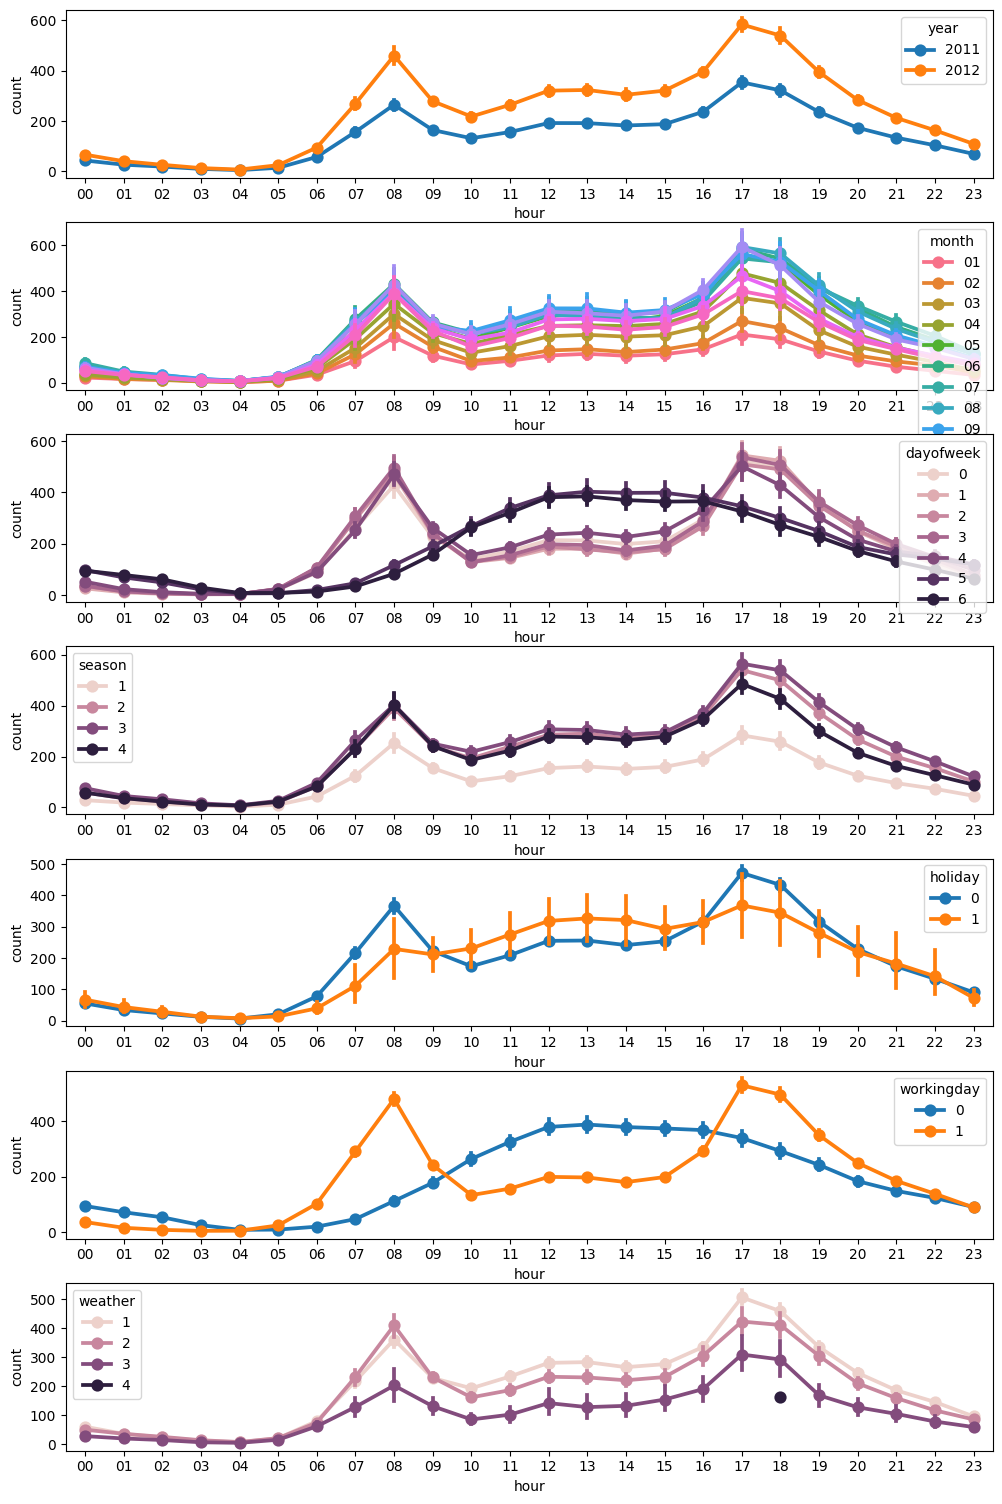

In [42]:
fig, axs = plt.subplots(7, figsize=(10,15))
plt.tight_layout()

sns.pointplot(x='hour', y='count', data=df, hue='year', ax=axs[0])
sns.pointplot(x='hour', y='count', data=df, hue='month', ax=axs[1])
sns.pointplot(x='hour', y='count', data=df, hue='dayofweek', ax=axs[2])
sns.pointplot(x='hour', y='count', data=df, hue='season', ax=axs[3])
sns.pointplot(x='hour', y='count', data=df, hue='holiday', ax=axs[4])
sns.pointplot(x='hour', y='count', data=df, hue='workingday', ax=axs[5])
sns.pointplot(x='hour', y='count', data=df, hue='weather', ax=axs[6])

plt.show()

The holiday and workingday graphs show different patterns; let's take both into account.
The count with weather 4 seems abnormal; better get dropped.

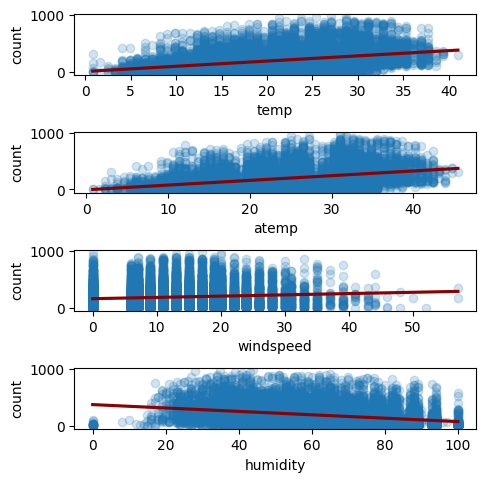

In [54]:
fig, axs = plt.subplots(4, figsize=(5,5))
plt.tight_layout(pad=2)

sns.regplot(x='temp', y='count', data=df, ax=axs[0], scatter_kws={'alpha':0.2}, line_kws={'color':'darkred'})
sns.regplot(x='atemp', y='count', data=df, ax=axs[1], scatter_kws={'alpha':0.2}, line_kws={'color':'darkred'})
sns.regplot(x='windspeed', y='count', data=df, ax=axs[2], scatter_kws={'alpha':0.2}, line_kws={'color':'darkred'})
sns.regplot(x='humidity', y='count', data=df, ax=axs[3], scatter_kws={'alpha':0.2}, line_kws={'color':'darkred'})

plt.show()

Graphs of temp and atemp show similar regression lines; no need to employ both of them.
Zeros in the windspped column affects the regression. 

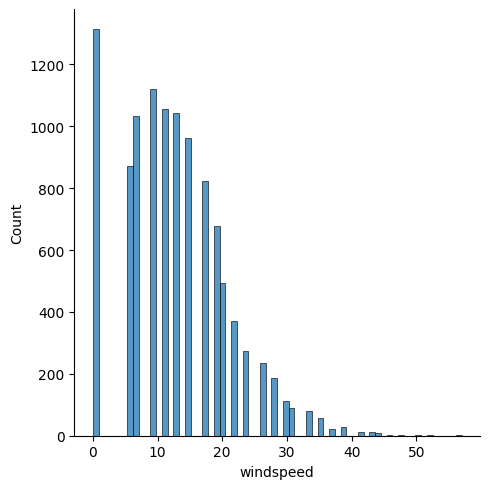

# of zeros :  1313
ratio of zeros :  0.121


In [56]:
sns.displot(df['windspeed'])
plt.show()

print('# of zeros : ', len(df[df['windspeed']==0.0]))
print('ratio of zeros : ', np.round(len(df[df['windspeed']==0.0])/len(df),3))

About ten percent of the values are missing.
Let's do this : Drop either the entire column or the rows having zero value. 
The best approach would be to compare performance of a regression model in these two cases.

In [58]:
df_wo_windspeed = df.copy()
dropIdx = df[df['windspeed']==0.0].index
df_wo_windspeed = df_wo_windspeed.drop(dropIdx)
df_wo_windspeed.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,hour,dayofweek
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,2011,01,05,5
10,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36,2011,01,10,5
11,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,56,2011,01,11,5
12,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29,55,84,2011,01,12,5
13,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94,2011,01,13,5


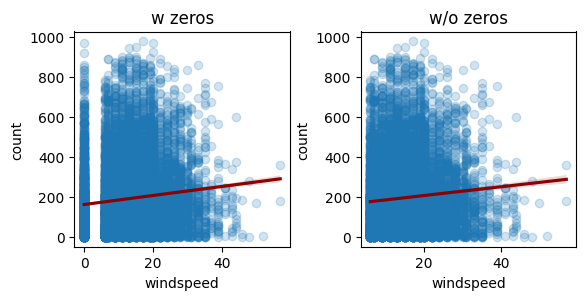

In [64]:
fig, axs = plt.subplots(1,2, figsize=(6,3))
plt.tight_layout(pad=2)
sns.regplot(x='windspeed', y='count', data=df, ax=axs[0], scatter_kws={'alpha':0.2}, line_kws={'color':'darkred'})
sns.regplot(x='windspeed', y='count', ax=axs[1], data=df_wo_windspeed, scatter_kws={'alpha':0.2}, line_kws={'color':'darkred'})
axs[0].set_title('w zeros')
axs[1].set_title('w/o zeros')
plt.show()

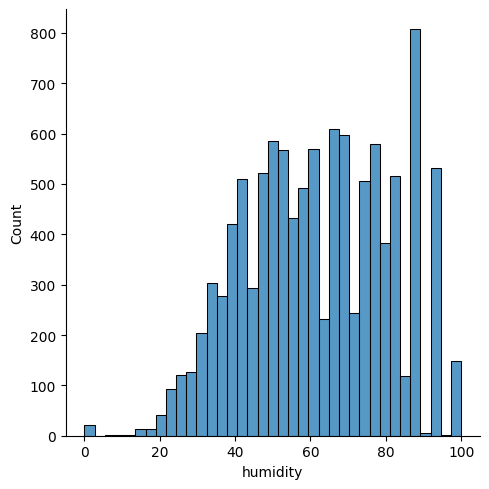

# of zeros :  22
ratio of zeros :  0.002


In [55]:
# what about the humidity column?
sns.displot(df['humidity'])
plt.show()

print('# of zeros : ', len(df[df['humidity']==0.0]))
print('ratio of zeros : ', np.round(len(df[df['humidity']==0.0])/len(df),3))

This proportion is just ignorable. Let's keep this coulmn.

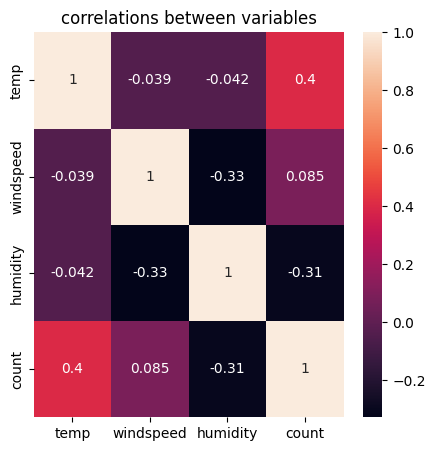

In [67]:
# check correlations between variables.
corr = df_wo_windspeed[['temp', 'windspeed','humidity','count']].corr()
fig, axs = plt.subplots(figsize=(5,5))
sns.heatmap(corr, annot=True)
axs.set_title('correlations between variables')
plt.show()

Only the last row or column contains meaningful information.
We can drop the windspeed column given its relatively low correlation with count, whearas themp and humidity show strong ones with count.

HERE'S WHAT TO DO IN THE PRE-PROCESSING PHASE:
<ul>
    <li>Add features from the datetime column : year, month, and hour</li>
    <li>Drop columns : atemp, windspeed, casual, and registered</li>
    <li>Drop rows where wheather==4</li>
</ul>

In [49]:
import pandas as pd
import numpy as np

# import all data sets
train = pd.read_csv('data/bike-sharing-demand/train.csv')
test = pd.read_csv('data/bike-sharing-demand/test.csv') # does not have a count column
submission = pd.read_csv('data/bike-sharing-demand/sampleSubmission.csv') # consists of datetime and count

In [50]:
# Drop rows where wheather==4 in the train set by boolean masking
train = train[train['weather']!=4]
train['weather'].unique()

array([1, 2, 3])

In [51]:
# combine train and test sets to apply the same feature engineering.
print(len(train), len(test))

data = pd.concat([train, test], ignore_index=True)
print(len(data))
data.head()

10885 6493
17378


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


In [52]:
# add new features (i.e. )
data['datetime'] = pd.to_datetime(data['datetime'])
data['year'] = data['datetime'].dt.year
data['month'] = data['datetime'].dt.month
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011,1


In [53]:
# select features
data = data[['year','month','holiday','workingday','weather','temp','humidity','count']]
data.head()

,year,month,holiday,workingday,weather,temp,humidity,count
0,2011,1,0,0,1,9.84,81,16.0
1,2011,1,0,0,1,9.02,80,40.0
2,2011,1,0,0,1,9.02,80,32.0
3,2011,1,0,0,1,9.84,75,13.0
4,2011,1,0,0,1,9.84,75,1.0


Try L1 and L2 multiple regression first.

In [54]:
# split data into train and test sets
# here the fact that the test set has NaNs in the count column
train = data[~pd.isnull(data['count'])]
test = data[pd.isnull(data['count'])]

# spare the cout column for training a model
target = train['count']

# erase the count column in both sets
train = train.drop(['count'], axis=1)
test = test.drop(['count'], axis=1)

In [55]:
# check dimension of the variables train and target
print('train data : \n', train.values, '\n\n test data : \n', target.values)

train data : 
 [[2.011e+03 1.000e+00 0.000e+00 ... 1.000e+00 9.840e+00 8.100e+01]
 [2.011e+03 1.000e+00 0.000e+00 ... 1.000e+00 9.020e+00 8.000e+01]
 [2.011e+03 1.000e+00 0.000e+00 ... 1.000e+00 9.020e+00 8.000e+01]
 ...
 [2.012e+03 1.200e+01 0.000e+00 ... 1.000e+00 1.394e+01 6.100e+01]
 [2.012e+03 1.200e+01 0.000e+00 ... 1.000e+00 1.394e+01 6.100e+01]
 [2.012e+03 1.200e+01 0.000e+00 ... 1.000e+00 1.312e+01 6.600e+01]] 

 test data : 
 [ 16.  40.  32. ... 168. 129.  88.]


In [56]:
# try the most elementary approach
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(train, target)

In [57]:
# add polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
poly.get_feature_names_out()

array(['year', 'month', 'holiday', 'workingday', 'weather', 'temp',
       'humidity', 'year^2', 'year month', 'year holiday',
       'year workingday', 'year weather', 'year temp', 'year humidity',
       'month^2', 'month holiday', 'month workingday', 'month weather',
       'month temp', 'month humidity', 'holiday^2', 'holiday workingday',
       'holiday weather', 'holiday temp', 'holiday humidity',
       'workingday^2', 'workingday weather', 'workingday temp',
       'workingday humidity', 'weather^2', 'weather temp',
       'weather humidity', 'temp^2', 'temp humidity', 'humidity^2'],
      dtype=object)

In [79]:
train_poly.shape

(8163, 35)

In [58]:
# standard scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [59]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.3316821846196457
0.3303020573877615


Far too low scores! the next step is then to optimizae its hyperparameter alpha :

C:\Users\syj43\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.218e+07, tolerance: 2.618e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\syj43\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.816e+06, tolerance: 2.618e+04
  model = cd_fast.enet_coordinate_descent(
C:\Users\syj43\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

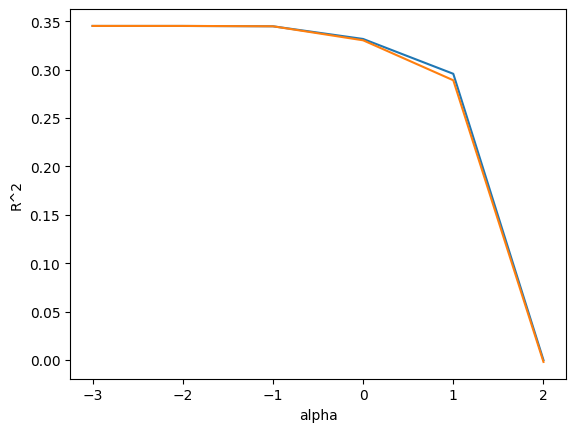

In [60]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

# plot the two lists
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [65]:
lasso = Lasso(alpha=1)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.3316821846196457
0.3303020573877615


In [66]:
# Try Ridgre (L2)
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.3316821846196457
0.3303020573877615


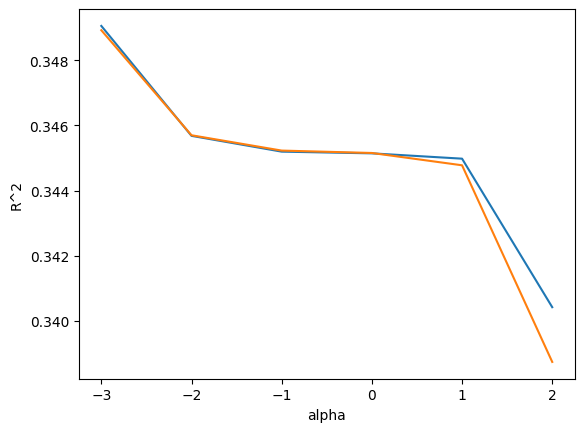

In [67]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

# plot the two lists
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [68]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.3316821846196457
0.3303020573877615


Thease two show such poor scores.

In [69]:
# any change if we don't use polynomial features?
data.head()

,year,month,holiday,workingday,weather,temp,humidity,count
0,2011,1,0,0,1,9.84,81,16.0
1,2011,1,0,0,1,9.02,80,40.0
2,2011,1,0,0,1,9.02,80,32.0
3,2011,1,0,0,1,9.84,75,13.0
4,2011,1,0,0,1,9.84,75,1.0


In [80]:
data_scaled['temp'].values.shape

(17378,)

In [86]:
data_scaled = data.copy()
data_scaled['year'] = data_scaled['year'].map({2011:0, 2012:1})
data_scaled['month'] = data_scaled['month'].apply(lambda x: (x-1)/11)
data_scaled['weather'] = data_scaled['weather'].apply(lambda x: (x-1)/2)

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(data_scaled['temp'].values.reshape(-1,1))
data_scaled['temp'] = mm.transform(data_scaled['temp'].values.reshape(-1,1))

mm = MinMaxScaler()
mm.fit(data_scaled['humidity'].values.reshape(-1,1))
data_scaled['humidity'] = mm.transform(data_scaled['humidity'].values.reshape(-1,1))

data_scaled.head()

,year,month,holiday,workingday,weather,temp,humidity,count
0,0,0.0,0,0,0.0,0.224490,0.81,16.0
1,0,0.0,0,0,0.0,0.204082,0.80,40.0
2,0,0.0,0,0,0.0,0.204082,0.80,32.0
3,0,0.0,0,0,0.0,0.224490,0.75,13.0
4,0,0.0,0,0,0.0,0.224490,0.75,1.0


In [88]:
print(np.min(data_scaled['temp']), np.max(data_scaled['temp']))
print(np.min(data_scaled['humidity']), np.max(data_scaled['humidity']))

0.0 1.0
0.0 1.0


In [90]:
# split data into train and test sets
# here the fact that the test set has NaNs in the count column
train = data[~pd.isnull(data['count'])]
test = data[pd.isnull(data['count'])]

# spare the cout column for training a model
target = train['count']

# erase the count column in both sets
train = train.drop(['count'], axis=1)
test = test.drop(['count'], axis=1)

train_input, test_input, train_target, test_target = train_test_split(train, target)

In [91]:
lasso = Lasso()
lasso.fit(train_input, train_target)
print(lasso.score(train_input, train_target))
print(lasso.score(test_input, test_target))

0.3097311297579113
0.29903861826543066


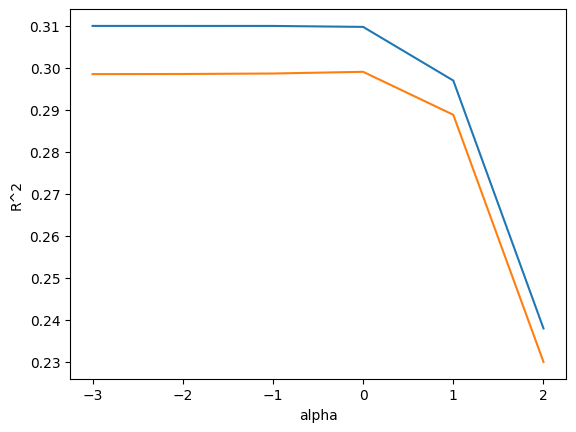

In [92]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha)
    lasso.fit(train_input, train_target)
    train_score.append(lasso.score(train_input, train_target))
    test_score.append(lasso.score(test_input, test_target))

# plot the two lists
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [95]:
lasso = Lasso(alpha=1)
lasso.fit(train_input, train_target)
print(lasso.score(train_input, train_target))
print(lasso.score(test_input, test_target))

0.3097311297579113
0.29903861826543066


These approaches do not seem to get any better; try randomforest regression.

In [111]:
# split data into train and test sets
# here the fact that the test set has NaNs in the count column
train = data[~pd.isnull(data['count'])]
test = data[pd.isnull(data['count'])]

# spare the cout column for training a model
target = train['count']

# erase the count column in both sets
train = train.drop(['count'], axis=1)
test = test.drop(['count'], axis=1)

train_input, test_input, train_target, test_target = train_test_split(train, target)

In [112]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_jobs=-1, random_state=42)
score = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.round(np.mean(score['train_score']),3), np.round(np.mean(score['test_score']),3))

0.799 0.345


Overfitting!

In [ ]:
from sklearn.model_selection import GridSearchCV

param = { 
	'n_estimators': range(100,160,10), 
	'max_features': ['sqrt', 'log2', None], 
	'max_depth': range(1,6), 
	'max_leaf_nodes': range(1,6), 
}

gs = GridSearchCV(estimator=rf, param_grid=param, cv=5, n_jobs=-1)
gs.fit(train_input, np.log(train_target))
gs.best_params_

In [79]:
# In this competition, submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE).
# from sklearn.metrics import root_mean_squared_log_error as RMSLE